# UTS Rekayas Data Terapan
Azhari Haris Al Hamdi - 2106782694
Pasca sarjana UI 2021

link notebook : https://colab.research.google.com/drive/1OYevmksPcMLK7EncO1uv66j3OmFweLwO?usp=sharing

Naive Bayes & Logistic Regression Clsssifier - NLP NGrams classic classifier

data :

file : "1000 data dongeng.xlsx"

feature : kolom 1

label : kolom 2

# Diagram Blok Penyelesaian Classifikasi dan Analisis Permasalahan

![](https://drive.google.com/uc?export=view&id=1ezLHp90gGuPWJhDySFfWzZtPI6UXNb2A)

Dataset yang digunakan memiliki kelas target yang jumlahnya lebih dari dua, sehingga untuk metode classifier ada dua cara yang bisa dilakukan :

1. dengan metode multilabel classification yaitu memprediksi kelas yang hasil prediksinya bisa terdapat kelas dominan dengan probabilitas kelas yang dianggap positif adalah >= 0.5. pada metode ini digunakan sigmoid dan multilabel binary method.

2. dengan metode multiclass classification yaitu memprediksi kelas yang dihasilkan hanya satu yang mungkin paling dominan. jika ada kelas yang probabilitasnya > 0.5 maka kelas yang lain tidak mungkin > 0.5 atau kelas yang paling tinggi scorenya maka itulah yang keluar sebagai kelas prediksi. pada metode ini digunakan metode multinomial. pada logistic regression diperlukan generalisasi sigmoid lagi yang disebut softmax..

dari 2 metode ini saya memilih metode kedua yaitu dengan multiclass classification dengan softmax. pada data target kelas akan dilakukan label encoding untuk mendapatkan urutannya dan mempermudah prediksi karena menggunakan number sebagai data target bukan kata categorical.

# Install, Import dan Download Library Dependency [1] [2]

In [ ]:
!pip install Sastrawi

!pip install jupyterlab-widgets
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

!pip install parfit

     |████████████████████████████████| 209 kB 26.0 MB/s 
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: bundlerextension console execute kernel kernelspec
migrate nbconvert nbextension notebook qtconsole run serverextension
troubleshoot trust

Jupyter command `jupyter-labextension` not found.
  Created wheel

In [ ]:
import sys
import random
import re
import io
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import parfit.parfit as pf

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Upload File

## Uncomment code dibawah ini jika memakai jupyter notebook

In [ ]:
# from ipywidgets import FileUpload
# from IPython.display import display
# upload = FileUpload(accept='.xlsx', multiple=False)

## Run code dibawah ini jika memakai Google Colaboratory notebook

In [ ]:
# It will prompt you to select a file. Click on “Choose Files” then select and upload the file. 
# Wait for the file to be 100% uploaded.
from google.colab import files
uploaded = files.upload()

Saving 1000 data dongeng.xlsx to 1000 data dongeng.xlsx


# Exploratory Data Analysis

Import Data, gunakan nama **"1000 data dongeng.xlsx"**

tidak ada header pada dataset, jadi disini dibuat headernya(feature dan label) untuk membantu analisis dataframe.

In [ ]:
# To store dataset in a Pandas Dataframe
df = pd.read_excel('1000 data dongeng.xlsx', sheet_name=0, header=None, names=['feature', 'label'])
temp = df.copy()
df

,feature,label
0,"Ketika kedua kalinya sang ibu menghampirinya, ...",marah
1,Pangeran Empang Kuala murka mendengar pinangan...,marah
2,Bujang Kelana akan menantang Pendekar Katung u...,marah
3,Pendekar Katung yang tidak terima dengan kekal...,marah
4,Ibunya sangat marah. ‘’ Dasar bodoh! Baju kesa...,marah
...,...,...
995,"Akan tetapi, ia dan rombongan terkejut sebab d...",terkejut
996,"Mendengar hal itu, Halimah sangat kaget dan te...",terkejut
997,Ketika aku memperhatikan domba-domba yang seda...,terkejut
998,Pada suatu hari beliau duduk di gua Hira dan t...,terkejut


dari informasi type tiap kolom tidak ada data numerik

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feature  1000 non-null   object
 1   label    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


check apakah ada NaN. dari hasil check tidak ada row yang NaN

In [ ]:
df.isna().any()

feature    False
label      False
dtype: bool

count label tiap kelas dan plot dengan barplot

senang      278
sedih       194
terkejut    183
marah       161
takut       136
jijik        48
Name: label, dtype: int64

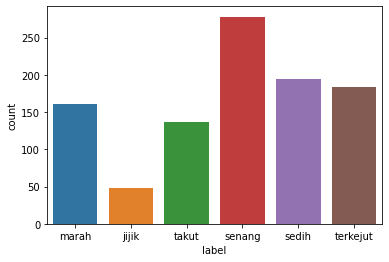

In [ ]:
display(df['label'].value_counts())
sns.countplot(x=df['label'])

dari hasil plot sebelum preprocessing data tidak balance, sehingga diperlukan balancing data untuk tiap kelas.

ambil sampel kalimat sebelum preprocessing

In [ ]:
temp_df_test = df.copy()
temp_df_test_jijik = df[df['label'] == 'jijik']
temp_df_test_senang = df[df['label'] == 'senang']
temp_df_test_jijik.reset_index(drop=True, inplace=True)
temp_df_test_senang.reset_index(drop=True, inplace=True)

kelas_jijik_1_sebelum_prepartion = temp_df_test_jijik['feature'][0]
kelas_senang_1_sebelum_prepartion = temp_df_test_senang['feature'][0]

print("=== data sebelum preprocessing ===")
print("data 1 pada kelas 'jijik' sebelum preprocessing :",kelas_jijik_1_sebelum_prepartion)
print("data 1 pada kelas 'senang' sebelum preprocessing :",kelas_senang_1_sebelum_prepartion)

=== data sebelum preprocessing ===
data 1 pada kelas 'jijik' sebelum preprocessing : Hei perempuan tua berpakaian lusuh, siapakah engkau ini hingga berani beraninya engkau memelukku
data 1 pada kelas 'senang' sebelum preprocessing : Sang Putri sangat asyik dengan acara tersebut, tak terasa hari sudah lewat tengah malam.


# Data Preparation

## Menghilangkan special karakter yang tidak dikenali dalam environtment python seperti “, ”, ‘’. yang mengacu pada tanda kutip dalam kata tidak langsung. 

In [ ]:
df = temp.copy()
for i, kalimat in enumerate(df["feature"]):
  kalimat = kalimat.replace("“", "\"")
  kalimat = kalimat.replace("‘’", "\"")
  kalimat = kalimat.replace("”", "\"")
  df.loc[i,"feature"] = kalimat

## transform ke huruf kecil, stopword, stemming, transform kalimat dari satu menjadi banyak kalimat, dan penghilangan tanda baca dan special karakter

menggunakan metode stopword dan stemming dalam kosa kata bahasa indonesia dengan library sastrawi. stop word diperlukan karena dalam sample kalimat di dataset ada kata yang tidak perlu seperti kata sang, si, adalah dan lain sebagainya, serta membalikkan kata dalam text menjadi kata dasarnya (stemming). [1] [2] 

pada metode dibawah ini, juga dilakukan transformasi kalimat menjadi beberapa kalimat karena ada banyak baris pada dataset beberapa kalimat yang disusun menjadi satu kalimat. metode ini juga untuk balancing class yang sedikit.

selanjutnya dilakukan penghilangan tanda baca atau special character yang lain yang bisa mengganggu corpus, karena ada banyak special character yang menyatu dengan kata. number juga dihilangkan pada proses dibawah ini karena numberik tidak memberikan korelasi dan informasi terhadap kelas data target.

dari metode dibawah ini semua proses ditanpung dalam satu list `new_data`

In [ ]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

new_data = []
exclude = ['', '"', '”']

df['feature'] = df['feature'].str.strip().str.lower()

for index, row in df.iterrows():
  label = row['label']
  sentence = row['feature']
  ## === menghilangkan kata yang dianggap tidak mengacu pada inti kalimatnya, seperti kata sang, si, dan, itu, dan lain sebagainya
  sentence_stopwords = stopword.remove(sentence)

  ## === mentransformasi kata-kata pada text menjadi kata dasarnya
  sentence = stemmer.stem(sentence_stopwords)
  # sentence = sentence_stemming if sentence_stopwords == "" or sentence_stopwords == " " else sentence_stopwords

  # sentence = find_words = re.compile(r'(?<!\S)[A-Za-z]+(?!\S)|(?<!\S)[A-Za-z]+(?=:(?!\S))').findall
  # sentence = re.match("^[A-Za-z]*$", sentence):
  tokens = nltk.tokenize.sent_tokenize(sentence)

  test = []
  for i, token in enumerate(tokens):
    ## === splitting text menjadi beberapa kalimat berdasarkan tanda ? ! "" dengan split regex
    test += re.split(r'[!?"(.*?)"]+|(?<!\.)\.(?!\.)', token)

  ## === menghapus tanda baca dan number pada kalimat yang dihasilkan dengan substract regex
  tokens = [re.sub(r'[^\w]', ' ', i) for i in test if i not in exclude]

  ## === menghilangkan angka dengan substract regex
  tokens = [re.sub("(\s\d+)","",i)  for i in tokens]

  for i, token in enumerate(tokens):
    if token != '' or token != ' ' or token != "\"":

      ## === menghilangkan duplicate words
      token = ' '.join(dict.fromkeys(token.split()))

      new_data.append([token, label])

## penyatuan list dan visualisasi banyaknya class label

pada hasil visualisasi di bawah ini, kolom label masih belum balance.

,feature,label
0,dua kali sang ibu hampir putri justru bentak,marah
1,pangeran empang kuala murka dengar pinang tolak,marah
2,bujang kelana tantang pendekar katung sabung ayam,marah
3,pendekar katung tidak terima kalah perintah aw...,marah
4,ibu sangat marah dasar bodoh baju sayang harga...,marah
...,...,...
995,tetapi dan rombong kejut samping huma buka pra...,terkejut
996,dengar itu halimah sangat kaget pukul,terkejut
997,aku perhati domba sedang main kaget datang ora...,terkejut
998,suatu hari beliau duduk gua hira tiba kaget da...,terkejut


senang      278
sedih       194
terkejut    183
marah       161
takut       136
jijik        48
Name: label, dtype: int64

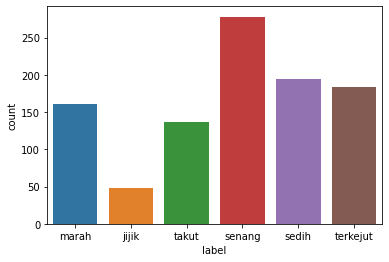

In [ ]:
dataset = pd.DataFrame(new_data, columns =['feature', 'label'])
display(dataset)
display(dataset['label'].value_counts())
sns.countplot(dataset['label'])

## balancing class : oversampling dengan augmentasi

pada tahap ini dilakukan balancing class dengan menggunakan teknik oversampling dengan merujuk pada kelas yang paling banyak yaitu kelas "senang". oversampling yang dilakukan disini dengan menggunakan Easy Data Augmentation Techniques(EDA) [3] pada text. ada empat cara melakukan Easy Data Augmentation pada text [3]:

1.   SR: synonym replacement
2.   RD: random deletion
3.   RS: random swap
4.   RI: random insertion

![](https://drive.google.com/uc?export=view&id=1gjONCCjRxrDl09Y6M052WBiqkttfq7eO)

balancing akan berguna untuk menyeimbangkan nilai probabilitas prior pada naive bayes dan P(y) pada logistic regression. 





In [ ]:
label_attr = dataset['label'].value_counts().to_dict()
label_class = dataset['label'].value_counts().index.to_list()
major_class = max(label_attr, key=label_attr.get)
major_class_num = label_attr[major_class]
print("kelas yang paling banyak berjumlah:", major_class_num)

kelas yang paling banyak berjumlah: 278


## berikut metode yang diambil dari [4]



In [ ]:
def swap_word(new_words):
    
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        
        if counter > 3:
            return new_words
    
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
    return new_words

def random_swap(words, n):
    
    words = words.split()
    new_words = words.copy()
    
    for _ in range(n):
        new_words = swap_word(new_words)
        
    sentence = ' '.join(new_words)
    
    return sentence

pemisahan data tiap kelas sehingga tiap kelas memiliki data frame masing-masing untuk memudahkan analisis dan augmentasi.

In [ ]:
list_df = []
for label in label_class:
  df_temp = dataset[dataset['label'] == label]
  df_temp.reset_index(drop=True, inplace=True)
  list_df.append(df_temp)

augmentasi kalimat dilakukan dengan cara random swap. pengambilan kalimat dari data frame yang telah dipisahkan sebelumnya dilakukan dengan acak. random swap dilakukan pada suatu kelas hingga jumlah kelas tersebut sama seperti kelas mayor.

alasan penggunaan random swap adalah karena feature extraction pada langkah selanjutnya digunakan bag of words yang diasumsikan bahwa 

1.   Posisi features (words) tidak penting.
2.   Feature Probabilities P(Xi|Cj) adalah independen pada tiap kelas (C).



In [ ]:
for i, data_class in enumerate(list_df):
  first_data = len(data_class)
  diff = major_class_num - len(list_df[i])
  label = data_class['label'][0]
  add_df = []
  if diff > 0:
    iter = major_class_num // len(data_class)
    for j in range(iter):
      diff = major_class_num - len(list_df[i])
      n_random = diff if diff < first_data else first_data
      feature2aug = random.sample(data_class['feature'].to_list(), n_random)
      for featureaug in feature2aug:
        feature_rand = random_swap(featureaug, j)
        # add_df.append([feature_rand, label])
        list_df[i].loc[len(list_df[i])] = [feature_rand, label]
      rest = major_class_num - len(data_class)
      if rest <= 0:
        break

penggabungan hasil augmentasi pada data frame menjadi dataset baru 

```
new_df
```
kemudian divisualisasikan class yang telah diaugmentasi tadi. hasilnya semua kelas sudah balance.


,feature,label
0,sang putri sangat asyik acara sebut tak asa ha...,senang
1,hebat dan bantu para siluman hutan hasil menan...,senang
2,suatu masa pamuncak rencong talang sangat gemb...,senang
3,nyata benar baju milik ibu sangat terima kasih...,senang
4,nenek sangat senang kepada,senang
...,...,...
273,segera usir bawang merah sampai ibu putih rumah,jijik
274,kuning badan herpakaian kumal bau kleting,jijik
275,kepala istri lihat lipan ikut kemudian putih e...,jijik
276,orang unta mereka waktu letak sembelih lempar ...,jijik


senang      278
sedih       278
terkejut    278
marah       278
takut       278
jijik       278
Name: label, dtype: int64

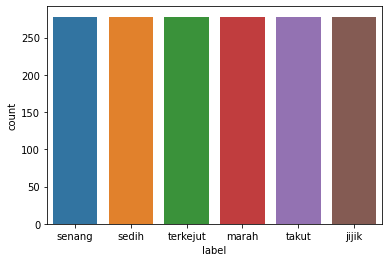

In [ ]:
new_df = pd.concat(list_df)
display(new_df)
display(new_df['label'].value_counts())
sns.countplot(new_df['label'])

ambil satu data hasil preprocessing pada kelas 'jijik' dan 'senang'. untuk melihat perbandingan hasil pemrosesan data

In [ ]:
temp_df_test = new_df.copy()
temp_df_test_jijik = temp_df_test[temp_df_test['label'] == 'jijik']
temp_df_test_senang = temp_df_test[temp_df_test['label'] == 'senang']
temp_df_test_jijik.reset_index(drop=True, inplace=True)
temp_df_test_senang.reset_index(drop=True, inplace=True)

kelas_jijik_1_setelah_prepartion = temp_df_test_jijik['feature'][0]
kelas_senang_1_setelah_prepartion = temp_df_test_senang['feature'][0]

print("=== data sebelum preprocessing ===")
print("data 1 pada kelas 'jijik' sebelum preprocessing :",kelas_jijik_1_sebelum_prepartion)
print("data 1 pada kelas 'senang' sebelum preprocessing :",kelas_senang_1_sebelum_prepartion)

print("\n")
print("=== data setelah preprocessing ===")
print("data 1 pada kelas 'jijik' setelah preprocessing :",kelas_jijik_1_setelah_prepartion)
print("data 1 pada kelas 'senang' setelah preprocessing :",kelas_senang_1_setelah_prepartion)

=== data sebelum preprocessing ===
data 1 pada kelas 'jijik' sebelum preprocessing : Hei perempuan tua berpakaian lusuh, siapakah engkau ini hingga berani beraninya engkau memelukku
data 1 pada kelas 'senang' sebelum preprocessing : Sang Putri sangat asyik dengan acara tersebut, tak terasa hari sudah lewat tengah malam.


=== data setelah preprocessing ===
data 1 pada kelas 'jijik' setelah preprocessing : hei perempuan tua pakai lusuh siapa engkau hingga berani peluk
data 1 pada kelas 'senang' setelah preprocessing : sang putri sangat asyik acara sebut tak asa hari lewat tengah malam


## Data Splitting

spliting dataset menjadi 80% training dan 20% testing untuk tiap kelas

random state dibuat 1 karena harus terjadi pengacakan pada data training dan data testing pada setiap kali method train_test_split dijalankan

In [ ]:
from sklearn.model_selection import train_test_split

train_df_list = []
test_df_list = []
for data in list_df:
  train_temp, test_temp = train_test_split(data, test_size=0.2, random_state=1, shuffle=True)
  train_df_list.append(train_temp)
  test_df_list.append(test_temp)

In [ ]:
train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)
print("data training set")
display(train_df['label'].value_counts())
print("\n")
print("data testing set")
display(test_df['label'].value_counts())

data training set


senang      222
sedih       222
terkejut    222
marah       222
takut       222
jijik       222
Name: label, dtype: int64



data testing set


senang      56
sedih       56
terkejut    56
marah       56
takut       56
jijik       56
Name: label, dtype: int64

## Label Encoding

agar proses learning terhadap data target merujuk pada number bukan pada data ordinal

In [ ]:
## === Label Encoding
labelencode = LabelEncoder()

y = train_df['label']
y_test = test_df['label']
y = labelencode.fit_transform(y)
y_test = labelencode.transform(y_test)

## Feature Extraction

### Bag Of Words

disini dilakukan vektorisasi pembuatan vocabulary dan Bag of Word, dan frequensi setiap kata yang muncul pada dataset yang selanjutnya diperlukan untuk modeling, serta mentransformasi kelas pada kolom target dengan label encoding karena kelas lebih dari satu. [5][8]

![](https://drive.google.com/uc?export=view&id=1xwqu84uemBu5T509ks1ElLxjScw0MVHv)

In [ ]:
## == Bag of Words Vectorization
vec = CountVectorizer()

x = train_df['feature']
x_test = test_df['feature']
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

Menampilkan hasil vectorisasi Bag of Word dengan frequensi katanya

In [ ]:
word_list = vec.get_feature_names()
count_list = x.sum(axis=0)
print(dict(zip(word_list,count_list)))

{'abang': 2, 'abdib': 1, 'abdih': 2, 'abdillah': 2, 'abrahah': 9, 'abrahahh': 2, 'abu': 11, 'acara': 2, 'ada': 56, 'adalah': 20, 'adik': 10, 'adu': 6, 'aduh': 1, 'aduhai': 1, 'aduhh': 1, 'agung': 2, 'ah': 1, 'aia': 2, 'air': 31, 'aja': 3, 'ajaib': 5, 'ajak': 1, 'ajar': 6, 'aji': 17, 'akal': 4, 'akan': 22, 'akbar': 1, 'akhir': 24, 'aki': 4, 'akibat': 2, 'akim': 9, 'aku': 108, 'aladin': 4, 'alah': 2, 'alam': 2, 'alami': 2, 'alangkah': 11, 'algojo': 2, 'alibaba': 8, 'alih': 1, 'alir': 15, 'allah': 3, 'alun': 2, 'amal': 2, 'aman': 3, 'amarah': 2, 'amarahnya': 3, 'amat': 10, 'ambil': 11, 'ambing': 2, 'ambu': 2, 'aminah': 2, 'ampas': 2, 'ampo': 2, 'ampun': 4, 'amuk': 1, 'ana': 1, 'anak': 109, 'ananda': 2, 'anank': 1, 'anantakusuma': 1, 'ancam': 3, 'ande': 6, 'andre': 2, 'androcles': 5, 'aneh': 12, 'anggap': 6, 'anggota': 3, 'angguk': 2, 'anggun': 1, 'angin': 3, 'angkat': 4, 'angker': 2, 'angsa': 6, 'anjin': 2, 'anjing': 13, 'antara': 2, 'anteh': 9, 'apa': 22, 'api': 2, 'arah': 5, 'arena': 3,

# Modeling Naive Bayes Multinomial

Karena pendekatan solusi menggunakan multiclass classification maka pada metode naive bayes digunakan pendekatan multinomial. pada metode dibawah ini digunakan perhitungan pencarian probabilitas suatu kata Wj pada kelas Cj dengan mengacu penambahan variabel smooting alpha untuk menghindari pembagian 0. [6][8]

> alpha = 1 -> Laplace Smooting

> alpha < 0 -> Lidstone Smoothing


![](https://drive.google.com/uc?export=view&id=14f7r-WUAuJZdLKgoRN4iH2eK8ZXzJTKn)

In [ ]:
model = MultinomialNB()
model.fit(x, y)

print("Score Training dari hasil modeling Multinomial Naive Bayes (tanpa fine tuning):", model.score(x, y))

Score Training dari hasil modeling Multinomial Naive Bayes (tanpa fine tuning): 0.9797297297297297


## Tuning hyperparameter menggunakan grid search

disini diterapkan pencarian hyperparameter terbaik dengan grid search. pada grid search ini dilakukan mencapi parameter terhapdap 2 method, CountVectorizer dengan rentang max_df = 0.1 - 1 dan ngram-range dari (1,1) hingga (1,5) dan MultinomialNB untuk mencari nilai alpha(bobot smooting) dengan rentang nilai 0.0004 - 10. pada fine tuning ini juga dilakukan cross validation dengan 10 segmen training-testing.[11]

In [ ]:
X = train_df['feature'].to_numpy()
Y = train_df['label'].to_numpy() 

pipeline = Pipeline([
    # ('BagOfWOrdsMetd', TfidfVectorizer()),
    ('BagOfWOrdsMetd', CountVectorizer()),
    ('clf', OneVsRestClassifier(MultinomialNB(
        fit_prior=True, class_prior=None))),
])
parameters = {
    'BagOfWOrdsMetd__max_df': (0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1),
    'BagOfWOrdsMetd__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4), (1,5)],
    'clf__estimator__alpha': (1e+1, 2, 1, 1e-1, 1e-2, 1e-3, 1e-4)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=10, n_jobs=2, verbose=3)
grid_search_tune.fit(X, Y)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 10 folds for each of 665 candidates, totalling 6650 fits
Best parameters set:
[('BagOfWOrdsMetd', CountVectorizer(max_df=0.25, ngram_range=(1, 3))), ('clf', OneVsRestClassifier(estimator=MultinomialNB(alpha=1)))]


dari hasil tuning grid search didapat parameter Bag of Words adalah 

```
max_df=0.25, ngram_range=(1, 3)
```
dan parameter Multinomial NaiveBayes adalah 

```
alpha=1
```
dari nilai alpha yang didapat parameter terbaik jika menggunakan laplace smoothing karena alpha = 1, sedangkan jika alpha < 1 berarti menggunakan Lidstone smoothing



## Menerapkan fine tuning bast parameter dari grid search

In [ ]:
vec = CountVectorizer(max_df=0.25, ngram_range=(1, 3))
x = train_df['feature']
x_test = test_df['feature']

x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [ ]:
model = MultinomialNB(alpha=1)
model.fit(x, y)

print("Score Training dari hasil Multinomial Naive Bayes (fine tuning):", model.score(x, y))

Score Training dari hasil Multinomial Naive Bayes (fine tuning): 1.0


In [ ]:
yhat = model.score(x_test, y_test)
yhat

0.9494047619047619

mendapatkan mapping label encoder untuk memetakan label number ke label class ordinal untuk visualisasi confussion matrix

In [ ]:
target_names = labelencode.classes_.tolist()
label2index = dict(zip(labelencode.classes_,range(len(labelencode.classes_))))
label2index

{'jijik': 0, 'marah': 1, 'sedih': 2, 'senang': 3, 'takut': 4, 'terkejut': 5}

In [ ]:
yhat = model.predict(x_test)
print(classification_report(y_test, yhat, target_names=target_names))

              precision    recall  f1-score   support

       jijik       0.95      1.00      0.97        56
       marah       0.92      0.98      0.95        56
       sedih       1.00      0.86      0.92        56
      senang       0.96      0.95      0.95        56
       takut       0.92      0.96      0.94        56
    terkejut       0.96      0.95      0.95        56

    accuracy                           0.95       336
   macro avg       0.95      0.95      0.95       336
weighted avg       0.95      0.95      0.95       336



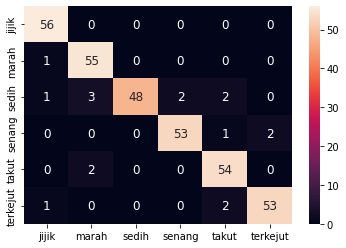

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, yhat)

cm_array_df = pd.DataFrame(confusion_matrix, index=target_names, columns=target_names)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}) 

## Penjelasan

mengacu pada Precission, Recall, dan F1-Score yang merupakan scoring yang tidak terpengaruh pada overfitting karena tidak ada variabel True Negatif. dari tabel classification report didapat bahwa pada kelas 'jijik' memiliki nilai 1 pada recall dan pernah bernilai 1 juga pada precission dan F1 pada training sebelumnya. hal ini terjadi karena adanya duplikasi berkali-kali dari kelas 'jijik pada saat balancing' class karena kelas jijik setelah dilakukan preprocessing seblum balancing berjumlah 48. kemudian diduplikasi ke jumlah 278 (mengikuti major class 'senang') dengan melakukan random swap. meskipun dilakukan random swap dan di asumsikan urutan kata bukan hal yang dipertimbangkan, tapi dalam hal ini kelas 'jijik' terkenali secara maksimal (False Negatif = 0) pada data testing. karena duplikasi kelas 'jijik' 278/48 =~ 6 kali mengalami duplikasi maka hampir 100% data testing ada pada data training. yang artinya pada proses testing data pada kelas 'jijik' melakukan test pada sebagian data training meskipun urutannya sudah acak yang artinya tidak ada urutan yang sama pada setiap kalimat dari kelas 'jijik'.

sedangkan untuk kelas 'sedih' memiliki nilai yang paling rendah pada recall. pada confussion matrix juga terlihat peluang prediksi kelas 'sedih' terbagi hampir ke seluruh kelas. hal ini menandakan kelas 'sedih', proses terkenali tidak se-general kelas lainnya (masih banyak faktor False Negatifnya). hal ini mungkin terjadi karena pengacakan corpus pada kelas 'sedih' tidak merata, bisa saja terjadi corpus hasil random swap tidak sepenuhnya terdistribusi ke data training dan testing. jika data versampling dengan random swap banyak ke data training maka mengakibatkan terjadinya hasil prediksi True Positif yang lebih sedikit.

![](https://drive.google.com/uc?export=view&id=1yduASLP-EG9pAb7NupQ0FUr7HqKMsKDy)

seperti pada asumsi naive bayes, urutan kata tidak berpengaruh yang artinya jika urutan kata berbeda maka prbabilitas likelihood akan berbeda dan akan dianggap sebagai corpus yang berbeda juga. dan pada asumsi kedua, seluruh kata dianggap independen hal ini benar karena pada pengacakan kata dan data frame akan menghasilkan score probabilitas yang berbeda juga.

skor akurasi secara keseluruhan pada data testing adalah 95% dan 99% pada data training yang artinya model tidak overfitting.

scoring acurasi juga bergantung dari shuffle data frame pada data training, sebelumnya pernah didapat nilai akurasi 94% dan 97% untuk data testing.

# Modeling Logistic Regression dengan Multinomial

Kasus analisis model ini adalah dengan menggunakan pendekatan Multiclass-Classification karena satu corpus memprediksi 1 class dominan dari 6 kelas. oleh karena itu diperlukan konfigurasi Logistic Regression yang dapat menyelesaikan multilabel classification. pada [7] dijelaskan bahwa multilabel dapat disetting ke multinomial dengan “lbfgs”, “sag” and “newton-cg” solvers hanya support l2 regularization dan no regularization.[7]

Multinomial logistic regression menggunakan generalisasi sigmoid yang disebut dengan fungsi softmax , persamaan fungsi softmax adalah sebagai berikut

![](https://drive.google.com/uc?export=view&id=1HKDoR6EV-i-DRIoZ_nTOHeunUEBob8Xx)

pada akhir prediksi didapatkan satu vektor yang berisi seluruh kelas.

![](https://drive.google.com/uc?export=view&id=1_nBS10-7EJSY3w8hKGT6jHBk1gWuDBPc)

ilustrasi output multinomial dengan fungsi softmax adalah sebagai berikut

![](https://drive.google.com/uc?export=view&id=1GcscduV0d04YcZVw6j-oBA7h-xAR-DqW)

dari softmax masing-masing kelas memiliki probabilitas masing-masing, sehingga kelas yang paling dominan(nilai probabilitas yang paling besar) yang dinyatakan sebagai kelas yang terprediksi. itu sebabnya softmax adalah fungsi untuk multiclass classification dari logictic regression. [8]

Pemodelan multinomial logistic regression dengan parameter default(tanpa tuning hyperparameter)

In [ ]:
model = LogisticRegression(multi_class='multinomial')
model.fit(x, y)

print("Score Training dari hasil modeling Multinomial Logistic Regression (tanpa fine tuning):", model.score(x, y))

Score Training dari hasil modeling Multinomial Logistic Regression (tanpa fine tuning): 1.0


parameter grid search diset pada :

penalty: ['none','l2'] , l1 tidak termasuk karena pada library sklearn l1 menggunakan liblinear. liblinear tidak cocok dengan parameter multinomial [7]. berikut ini tuning hyperparameter dengan parfit [12]

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed: 16.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    2.2s finished


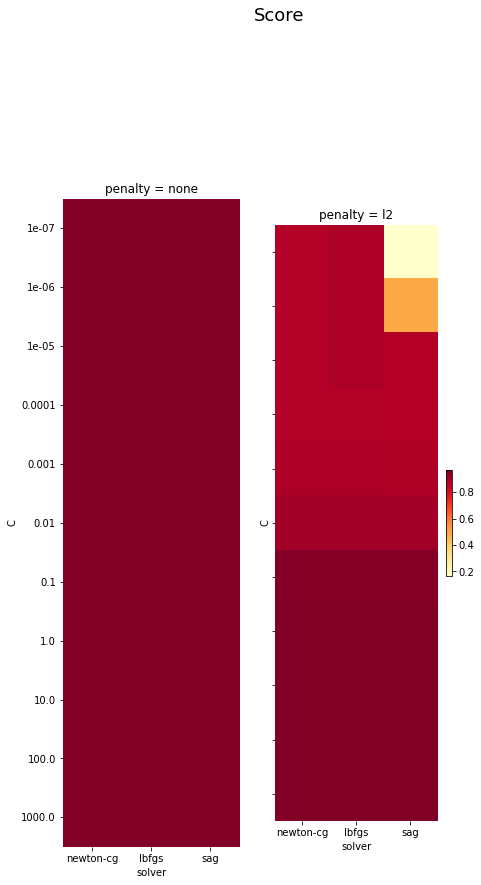

LogisticRegression(C=1e-07, multi_class='multinomial', n_jobs=-1,
                   penalty='none', random_state=42, solver='newton-cg') 0.9702380952380952


In [ ]:
grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e+1, 1e+2, 1e+3],
    'solver'  : ['newton-cg', 'lbfgs', 'sag'],
    'n_jobs': [-1],
    'penalty': ['none','l2'],
    'random_state': [42],
    'multi_class' : ['multinomial'],
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(LogisticRegression, paramGrid,
           x, y, 
           X_val=x_test, y_val=y_test,  
           metric = accuracy_score,
           )
print(bestModel, bestScore)

dari hasil tuning hyperparameter didapat dua kemungkinan best parameter

1. penalty: none, C=1e-7, dan solver:'newton-cg'

2. penalty: l2, C=1e+3, dan solver:'newton-cg'

dari dua kemungkinan diatas, disini dipakai yang point 2 karena lebih baik menggunakan regularisasi untuk memprevent overfitting dan meskipun tidak kuat pada outlier.

code dibawah ini menerapkan hasil tuning hyper parameter dari multinominal logistic regression

In [ ]:
model = LogisticRegression(
    multi_class='multinomial',
    C=1e+3,
    solver='newton-cg', 
    penalty='l2')
model.fit(x, y)

print("Score Training dari hasil modeling Logistic Regression (fine tuning):", model.score(x, y))

Score Training dari hasil modeling Logistic Regression (fine tuning): 1.0


menerapkan model dengan fine tuning hyperparameter ke data testing dan membuat classification report

In [ ]:
yhat = model.predict(x_test)
print(classification_report(y_test, yhat, target_names=target_names))

              precision    recall  f1-score   support

       jijik       0.97      1.00      0.98        56
       marah       0.98      0.96      0.97        56
       sedih       0.98      0.93      0.95        56
      senang       0.92      0.98      0.95        56
       takut       0.98      0.96      0.97        56
    terkejut       1.00      0.98      0.99        56

    accuracy                           0.97       336
   macro avg       0.97      0.97      0.97       336
weighted avg       0.97      0.97      0.97       336



Generate confussion matrix dari hasil prediksi terhadap data testing

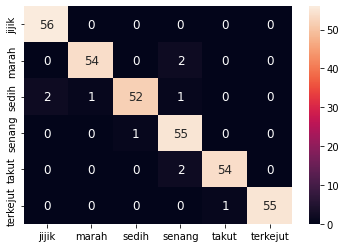

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, yhat)

cm_array_df = pd.DataFrame(confusion_matrix, index=target_names, columns=target_names)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}) 

# Penjelasan

pada hasil classification report didapat nilai recall pada kelas 'jijik' lebih tinggi. hal ini dikarenakan lebih banyaknya frequensi lexicon pada kelas tersebut dibandingkan dengan kelas yang lain pada data training dan juga dijumpai pada data testing akibat adanya oversampling. pada tabel terdapat nilai recall(true positif rate) terendah pada kelas 'takut'. hal ini menandakan generalisasi model pada kelas 'sedih' tidak sebaik pada kelas lainnya dan menandakan kelas tersebut memiliki frekuensi kata yang paling sedikit dibandingkan dengan yang lainnya pada data training, menyebabkan false negatif hasil prediksinyanya lebih besar dibandingkan dengan kelas lain.

pada confussion matrix, model banyak salah dalam prediksi kelas 'sedih' yang false negatif prediksinya tersebar pada kelas 'jijik', 'marah' dan 'senang'. kesalahan yang terjadi disini cukup kecil, mengingat nilai F1 score untuk kelas tersebut cukup baik yaitu 95%.

precission kelas 'senang' yang paling rendah pada classification report pada confussion matrix, model banyak salah dalam prediksi kelas 'senang' yang false positif prediksinya tersebar pada kelas 'sedih', 'marah' dan 'takut'. kesalahan yang terjadi disini cukup kecil, mengingat nilai F1 score untuk kelas tersebut cukup baik yaitu 95%. sedangkan untuk kelas 'terkejut' score precissionnya 1 artinya tidak ada false positifnya. pada confussion matrix tidak ada false predicted pada kolom 'terkejut'.

dari hasil classification report maupun confussion matrix terlihat bahwa pada kelas 'sedih' corpusnya memiliki frekuensi yang lebih sedikit daripada kelas lain. hal ini berarti weight pada corpus kelas 'sedih' generalisasi weightnya tidak sebaik kelas lainnya. seperti para persamaan multinomial logistic regression dibawah ini apabila nilai x besar maka probabilitas P(Y) pada kelas k semakin besar.

![](https://drive.google.com/uc?export=view&id=1EwXbn3vXGzPlpOmAqSrYaxdCuyUuS7xH)

skor akurasi secara keseluruhan pada data testing adalah 97% dan 99% pada data training yang artinya model tidak overfitting. pada percobaan sebelumnya didapat akurasi 99%.

perbedaan scoring ini karena shuffling pada saat pembagian porsi data training dan data testing. semakin banyak frekuensi kata yang muncul pada suatu kelas, maka weight akan semakin besar dan bisa meningkatkan score untuk data testing.

# Kesimpulan

*  metode Easy Data Augmentation dengan random swap bisa menambah dataset dan 
meningkatkan score prediksi.

*  kedua model Multinomial Naive Bayes dan Multinomial Logistic Regression memiliki karakteristiknya masing-masing dan keduanya sama berinteraksi dengan combination feature yang pada data preparation. pada model Multinomial Naive Bayes pengacakan letak kata akan menambah score prediksi dan meningkatkan learning N-Grams untuk prediksi kelas labelnya. semakin sering suatu kata muncul pada dalam kalimat pada suatu kelas maka score prediksinya akan meningkat.

*  pada model Multinomial Logistic Regression nilai scoring tergantung pada jumlah frekuensi kata dalam corpus. semakin banyak frequensinya dan semakin sering terjadi kemunculan kata dalam corpus maka akan semakin tinggi score prediksinya.

# Referensi

[1] https://tau-data.id/d/nlptm-02.html

[2] https://ksnugroho.medium.com/dasar-text-preprocessing-dengan-python-a4fa52608ffe

[3] Wei, Jason & Zou, Kai. (2019). EDA: Easy Data Augmentation Techniques for Boosting Performance on Text Classification Tasks.

[4] https://maelfabien.github.io/machinelearning/NLP_8/#random-insertion-ri

[5] https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

[6] https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

[7] Logistic regresssion. https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[8] Speech and Language Processing. Daniel Jurafsky & James H. Martin. Copyright © 2021. All rights reserved. Draft of December 29, 2021.

[9] Christopher M. Bishop: Pattern Recognition and Machine Learning, Chapter 4.3.4

[10] https://scikit-learn.org/dev/modules/linear_model.html#logistic-regression

[11] https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27

[12] https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4

